In [36]:
import numpy as np
import matplotlib.pyplot as plt
#założenia
N = 31 
dx = 1.0
d = 4.0
x0 = 4.0
max_iter = 500 

Zadanie 1

In [37]:
x = np.arange(-N, N+1, dx)
y = np.arange(-N, N+1, dx)
X, Y = np.meshgrid(x, y, indexing='ij')
#gęstość ładunku
rho = np.exp(-((X - x0)**2 + Y**2) / d**2) - np.exp(-((X + x0)**2 + Y**2) / d**2)

In [38]:
def compute_S(u, rho):
    #2gie pochodne
    lap_x = (u[2:, 1:-1] + u[:-2, 1:-1] - 2*u[1:-1, 1:-1]) / dx**2
    lap_y = (u[1:-1, 2:] + u[1:-1, :-2] - 2*u[1:-1, 1:-1]) / dx**2
    u_c   = u[1:-1, 1:-1]
    rho_c = rho[1:-1, 1:-1]
    S = -u_c * (0.5 * (lap_x + lap_y) + rho_c)
    return np.sum(S) * dx**2

In [39]:
def compute_rho_prim(u_grid):
    lap = (u_grid[2:,1:-1] + u_grid[:-2,1:-1] + u_grid[1:-1,2:] + u_grid[1:-1,:-2] - 4*u_grid[1:-1,1:-1]) / dx**2
    return -lap

In [40]:
u1 = np.zeros_like(X)
S1_vals = []
for i in range(1, max_iter+1):
    u_old = u1.copy()
    u1[1:-1, 1:-1] = (u_old[2:, 1:-1] + u_old[:-2, 1:-1]
                    + u_old[1:-1, 2:] + u_old[1:-1, :-2]
                    + rho[1:-1, 1:-1] * dx**2) / 4.0
    S1_vals.append(compute_S(u1, rho))
    if i == 100:
        u100 = u1.copy()
    if i == 500:
        u500 = u1.copy()

In [41]:
# Obliczenia dla iteracji 100 i 500
rho100_p = compute_rho_prim(u100)
rho500_p = compute_rho_prim(u500)
delta100 = rho100_p - rho[1:-1,1:-1]
delta500 = rho500_p - rho[1:-1,1:-1]

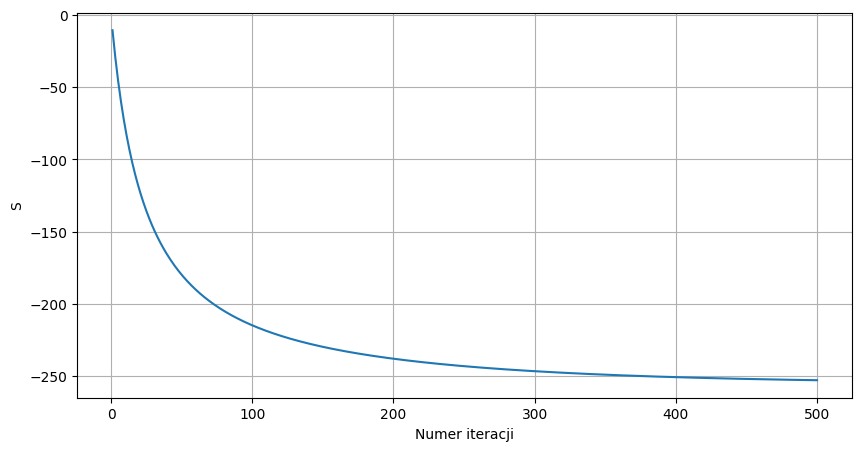

In [42]:
#1.1
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_iter+1), S1_vals,)
plt.xlabel('Numer iteracji')
plt.ylabel('S')
# plt.title('Przebieg funkcjonału S — Relaksacja')
plt.grid(True)
plt.show()

In [43]:
# Funkcja do rysowania mapy pola
def plot_field(field, title):
    plt.figure(figsize=(10,5))
    plt.imshow(field, origin='lower',extent=[-N+1, N-1, -N+1, N-1])
    plt.colorbar()
    # plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(False)
    plt.show()
    print(title)

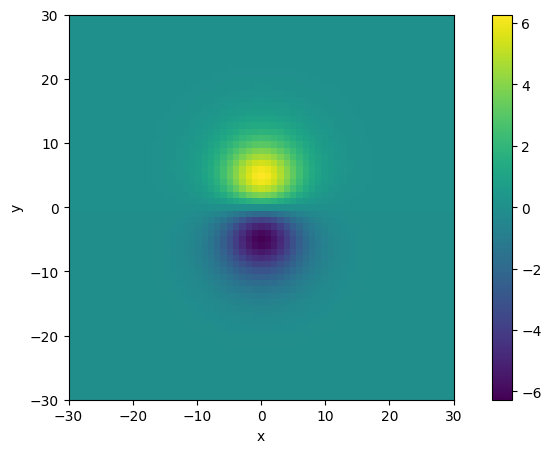

Potencjał U po 100 iteracjach


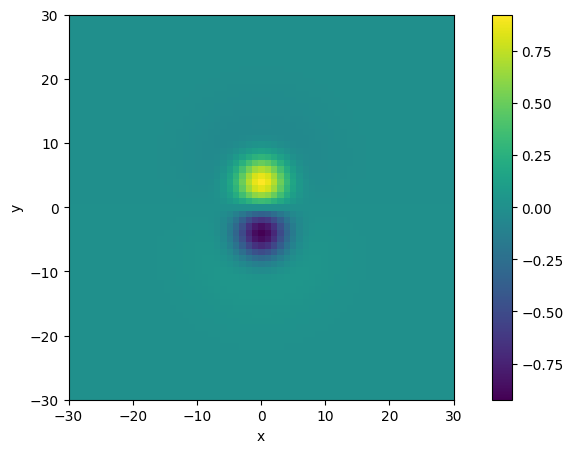

ρ' po 100 iteracjach


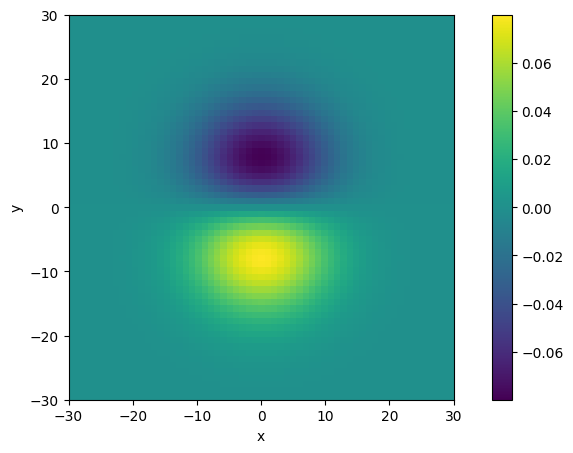

δ = ρ' - ρ po 100 iteracjach


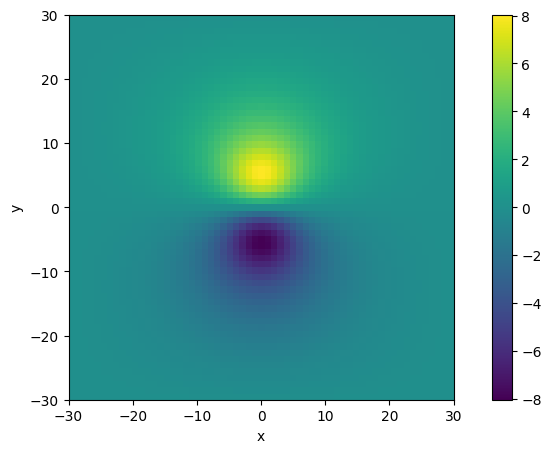

Potencjał U po 500 iteracjach


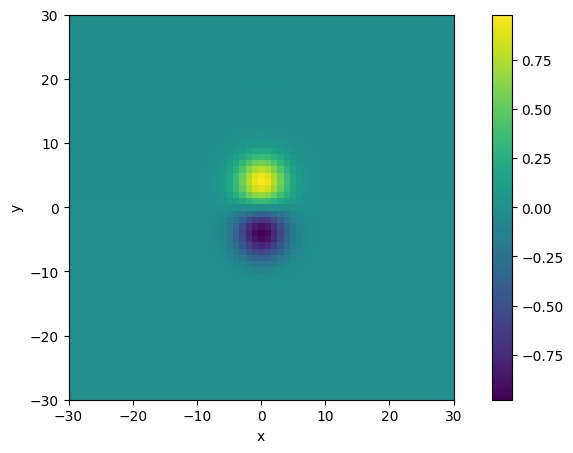

ρ' po 500 iteracjach


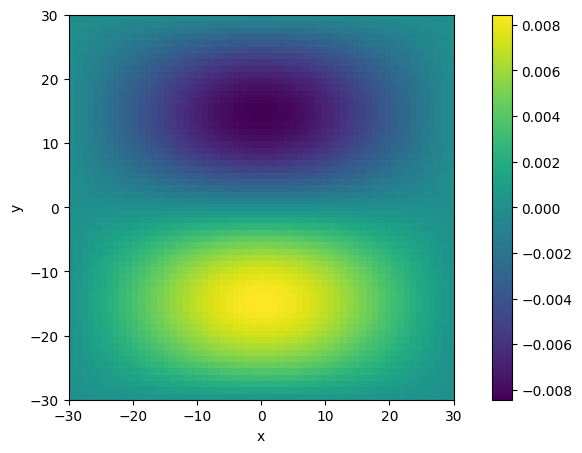

δ = ρ' - ρ po 500 iteracjach


In [44]:
#1.2 i 1.3
# Wyniki po 100 iteracjach
plot_field(u100[1:-1,1:-1], 'Potencjał U po 100 iteracjach')
plot_field(rho100_p, "ρ' po 100 iteracjach")
plot_field(delta100, "δ = ρ' - ρ po 100 iteracjach")

# Wyniki po 500 iteracjach
plot_field(u500[1:-1,1:-1], 'Potencjał U po 500 iteracjach')
plot_field(rho500_p, "ρ' po 500 iteracjach")
plot_field(delta500, "δ = ρ' - ρ po 500 iteracjach")

Zadanie 2

In [45]:
w = 1.9 

In [46]:
u2 = np.zeros_like(X)
S2_vals = []
for i in range(1, max_iter+1):
    for i in range(1, 2*N):
        for j in range(1, 2*N):
            u_new = (u2[i+1,j] + u2[i-1,j] + u2[i,j+1] + u2[i,j-1] + rho[i,j]*dx**2) / 4.0
            u2[i,j] = (1 - w)*u2[i,j] + w*u_new
    S2_vals.append(compute_S(u2, rho))

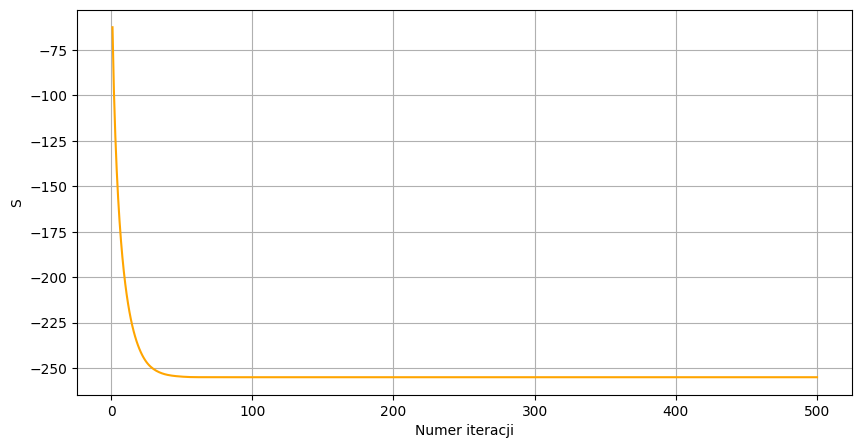

In [47]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_iter+1), S2_vals, 'orange')
plt.xlabel('Numer iteracji')
plt.ylabel('S')
# plt.title(f'Przebieg funkcjonału S — Nadrelaksacja (w={w})')
plt.grid(True)
plt.show()

Zadanie 3

In [48]:
delta_vals = [0.0, 0.5, 1.0]

In [49]:
def compute_Sloc(u, rho, i, j):
    Sloc = 0.0
    for ii in (i-1, i, i+1):
        for jj in (j-1, j, j+1):
            lapx = (u[ii+1,jj] + u[ii-1,jj] - 2*u[ii,jj]) / dx**2
            lapy = (u[ii,jj+1] + u[ii,jj-1] - 2*u[ii,jj]) / dx**2
            Sloc -= (0.5*u[ii,jj]*(lapx + lapy) + rho[ii,jj]*u[ii,jj]) * dx**2
    return Sloc

In [50]:
# zad3
u3 = np.zeros_like(X)
S3_vals = []
for it in range(1, max_iter+1):
    for i in range(2, 2*N-1):       
        for j in range(2, 2*N-1):
            u0 = u3[i,j]
            Sloc0 = compute_Sloc(u3, rho, i, j)

            # oblicz Sloc przy δ = 0, 0.5, 1.0
            S_pts = []
            for delta in delta_vals:
                u3[i,j] = u0 + delta
                S_pts.append(compute_Sloc(u3, rho, i, j))
            u3[i,j] = u0 

            S1, S2, S3 = S_pts
            num = 3*S1 - 4*S2 + S3
            den =   S1 - 2*S2 + S3
            delta4 = 0.25 * num/den if abs(den)>1e-12 else 0.0

            u3[i,j] = u0 + delta4
            S4 = compute_Sloc(u3, rho, i, j)
            cands = [ (delta_vals[k], S_pts[k]) for k in range(3) ] + [(delta4, S4)]
            delta_best, _ = min(cands, key=lambda x: x[1])

            u3[i,j] = u0 + delta_best

    S3_vals.append(compute_S(u3, rho))

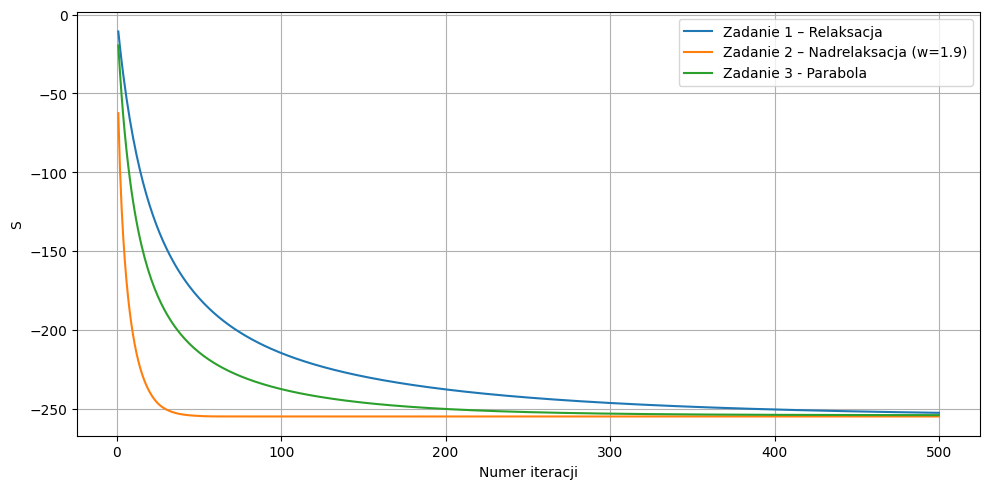

In [51]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, label='Zadanie 1 – Relaksacja')
plt.plot(np.arange(1, max_iter+1), S2_vals, label='Zadanie 2 – Nadrelaksacja (w=1.9)')
plt.plot(np.arange(1, max_iter+1), S3_vals, label='Zadanie 3 - Parabola')
plt.xlabel('Numer iteracji')
plt.ylabel('S')
# plt.title('Porównanie zbieżności metod')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Zadanie 4

In [52]:

#N = 31
#dx = 1.0
#d = 4.0
#x0 = 4.0
#max_iter = 500
d1 = 0.001
beta_vals = np.linspace(0.05, 0.5, 10)
#w = 1.9  

In [53]:
def compute_Sloc(u, rho, i, j):
    Sloc = 0.0
    for ii in (i-1, i, i+1):
        for jj in (j-1, j, j+1):
            lapx = (u[ii+1,jj] + u[ii-1,jj] - 2*u[ii,jj]) / dx**2
            lapy = (u[ii,jj+1] + u[ii,jj-1] - 2*u[ii,jj]) / dx**2
            Sloc -= (0.5*u[ii,jj]*(lapx + lapy) + rho[ii,jj]*u[ii,jj]) * dx**2
    return Sloc

In [ ]:
# szuka bete
final_S = []
for beta in beta_vals:
    u_test = np.zeros_like(X)
    for _ in range(1, max_iter+1):
        for i in range(2, 2*N-1):
            for j in range(2, 2*N-1):
                u0 = u_test[i,j]
                u_test[i,j] = u0 + d1
                S_plus = compute_Sloc(u_test, rho, i, j)
                u_test[i,j] = u0 - d1
                S_minus = compute_Sloc(u_test, rho, i, j)
                grad = (S_plus - S_minus) / (2*d1)
                u_test[i,j] = u0 - beta * grad
    final_S.append(compute_S(u_test, rho))

beta_opt = beta_vals[np.argmin(final_S)]
print(f"Optymalne β ≈ {beta_opt:.3f}")

In [ ]:
# zad3(2)
u3 = np.zeros_like(X)
S3_vals2 = []
for _ in range(1, max_iter+1):
    for i in range(2, 2*N-1):
        for j in range(2, 2*N-1):
            u0 = u3[i,j]
            u3[i,j] = u0 + d1
            S_plus = compute_Sloc(u3, rho, i, j)
            u3[i,j] = u0 - d1
            S_minus = compute_Sloc(u3, rho, i, j)
            grad = (S_plus - S_minus) / (2*d1)
            u3[i,j] = u0 - beta_opt * grad
    S3_vals2.append(compute_S(u3, rho))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, label='Zadanie 1 – Relaksacja')
plt.plot(np.arange(1, max_iter+1), S2_vals, label='Zadanie 2 – Nadrelaksacja (w=1.9)')
plt.plot(np.arange(1, max_iter+1), S3_vals2, label=f'Zadanie 4 – Gradient (β={beta_opt:.3f})')
plt.xlabel('Numer iteracji')
plt.ylabel('Funkcjonal S')
plt.title('Porównanie zbieżności metod')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Zadanie5

In [ ]:
r = 0.1

In [ ]:
u4 = np.zeros_like(X)
S4_vals = []
np.random.seed()  

for _ in range(1, max_iter+1):
    for i in range(1, 2*N):
        for j in range(1, 2*N):
            delta = np.random.uniform(-r, r)
            u_old = u4[i, j]
            S_before = compute_S(u4, rho)

            u4[i, j] += delta
            S_after = compute_S(u4, rho)

            if S_after >= S_before:
                u4[i, j] = u_old 

    S4_vals.append(compute_S(u4, rho))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(1, max_iter+1), S1_vals, label='Zadanie 1 – Relaksacja')
plt.plot(np.arange(1, max_iter+1), S2_vals, label='Zadanie 2 – Nadrelaksacja (w=1.9)')
plt.plot(np.arange(1, max_iter+1), S4_vals, label=f'Zadanie 5 – Losowe (r={r})')
plt.xlabel('Numer iteracji')
plt.ylabel('Funkcjonał S')
# plt.title('Porównanie zbieżności metod')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()